# Part 1 - Filters


## A)


<ol type="i" style="font-size: 14px;">
  <li>Acquire a colour image of your face.</li>
  <li>Develop a program to resize it to 512x512 pixels.</li>
  <li>Convert image to greyscale, and display the result.</li>
  <li>Find and display the <strong>minimum, maximum</strong> and <strong>mean</strong> greyscale values in the image.
</ol>


i)
Loading Image...

ii)
Resizing Image...
Saving Image...

iii)
Converting to greyscale...
See converted image below.


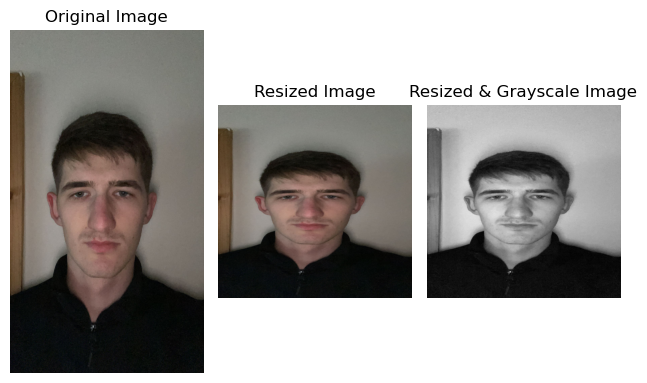

iv)
Calculating max, min, mean greyscale values...
Min Greyscale: 0.005776223165998088
Max Greyscale: 0.69824750632447
Mean Greyscale: 0.33209046738198


In [5]:
# import required packages
from skimage import img_as_ubyte
import skimage.color as color
import skimage.transform as transform
import skimage.io as io
import os
import matplotlib.pyplot as plt

# ee425_dir = os.path.join('C:\\', 'Users', 'adeli','Desktop','College','fourth_year','ee425-image-processing-and-analysis')
# assignment_dir = os.path.join(ee425_dir, 'ca_assignment')
assignment_dir = os.getcwd()

## i)
# Load the image
print("i)\nLoading Image...")
my_face = io.imread(os.path.join(assignment_dir, 'my_face.jpg'))

## ii)
# resizing the image to 512x512
print("\nii)\nResizing Image...")
my_face_resized = transform.resize(my_face, (512, 512))

# convert to integer values from 0-255 - io.imsave prefers integer values
print("Saving Image...")
my_face_resized_int = img_as_ubyte(my_face_resized)
io.imsave(os.path.join(assignment_dir, 'my_face_resized.jpg'), my_face_resized_int)

## iii)
# convert to greyscale
print("\niii)\nConverting to greyscale...")
my_face_resized_grey = color.rgb2gray(my_face_resized)

#save resized greyscale image - io.imsave prefers integer values
my_face_resized_grey_int = img_as_ubyte(my_face_resized_grey)
io.imsave(os.path.join(assignment_dir, 'my_face_resized_grey.jpg'), my_face_resized_grey_int)

print("See converted image below.")

fig, ax = plt.subplots(ncols=3)

ax[0].imshow(my_face, cmap=plt.cm.gray)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(my_face_resized, cmap=plt.cm.gray)
ax[1].set_title('Resized Image')
ax[1].axis('off')

ax[2].imshow(my_face_resized_grey, cmap=plt.cm.gray)
ax[2].set_title('Resized & Grayscale Image')
ax[2].axis('off')

fig.tight_layout()
plt.show()

## iv)
# max, min, mean greyscale vals
print("iv)\nCalculating max, min, mean greyscale values...")
minimum_greyscale = my_face_resized_grey.min()
maximum_greyscale = my_face_resized_grey.max()
mean_greyscale = my_face_resized_grey.mean()
print("Min Greyscale:", minimum_greyscale)
print("Max Greyscale:", maximum_greyscale)
print("Mean Greyscale:", mean_greyscale)


## B)


<ol type="i" style="font-size: 14px;"><li>Add Gussian noise (mean=0.0, variance=0.01) & Display result</li></ol>


Applying randomised noise to image...


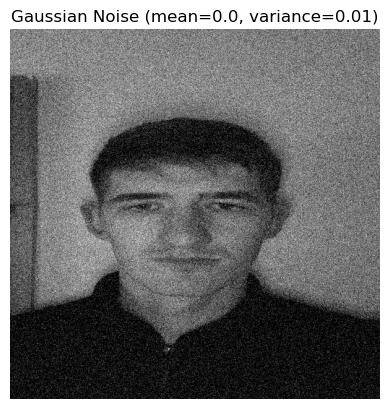

In [2]:
# note:
# code from part A must be ran before hand to include libraries used that we're imported then
import skimage.util as util
output_image = my_face_resized_grey
print("Applying randomised noise to image...")
my_face_with_noise = util.random_noise(output_image, mode='gaussian', mean=0.0, var=0.01)

ax = plt.subplot(1,1,1)
ax.imshow(my_face_with_noise, cmap=plt.cm.gray)
ax.set_title('Gaussian Noise (mean=0.0, variance=0.01)')
# added underscore due to strange output of axis constraints
_ = ax.axis('off')

plt.show()

# Saving image - prefers integers rather than floats
io.imsave(os.path.join(assignment_dir, 'my_face_with_noise.jpg'), img_as_ubyte(my_face_with_noise))



## C)


<ol type="i" style="font-size: 14px;">
<li>Apply 5x5 mean and median rank filter based noise reduction to result.</li>
<li>Display & discuss results, are they as expected from theoretical understanding of these filters?</li>
</ol>


i)
Applying 5x5 mean filter...
Applying meadian rank filter...

ii)
Displaying images...


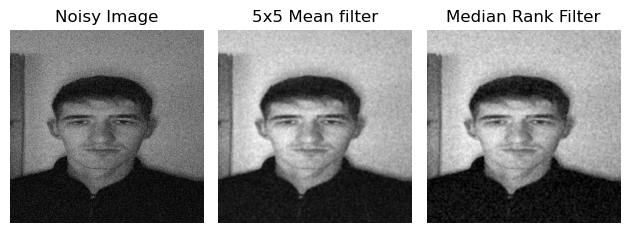

In [3]:
import skimage.filters as filters
import skimage.morphology as morphology

noisy_image = my_face_with_noise
noisy_img_ints = img_as_ubyte(my_face_with_noise)
footprint = morphology.square(5)

# filters.rank.x requires image in uint8
print("i)\nApplying 5x5 mean filter...")
five_by_five_mean_img = filters.rank.mean(noisy_img_ints, footprint=footprint)

print("Applying meadian rank filter...")
median_rank_img = filters.rank.median(noisy_img_ints, footprint=footprint)


print("\nii)\nDisplaying images...")
fig, ax = plt.subplots(ncols=3)

ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_title('Noisy Image')
ax[0].axis('off')

ax[1].imshow(five_by_five_mean_img, cmap=plt.cm.gray)
ax[1].set_title('5x5 Mean filter')
ax[1].axis('off')

ax[2].imshow(median_rank_img, cmap=plt.cm.gray)
ax[2].set_title('Median Rank Filter')
ax[2].axis('off')

fig.tight_layout()
plt.savefig(os.path.join(assignment_dir, 'noisy_image_vs_filters.jpg'))
plt.show()



### ii. Discussing on results

Both images seem to be brighter after the filter is applied, with some of the background noise being removed. Both filters do what is expected based of the theoritical understanding. The noise is smoothed out, and features are preserved. Based on the theoretical knowledge of these filters, the mean filtering causes slightly more blurring around the edges as opposed to the median filter, however, with the 5x5 structuring element, this is not as obvious in the results.


## D)


<ol type="i" style="font-size: 14px;">
<li>Apply Gaussian filter to noisy image (mean=0.0) for different values of of standard deviation. Display results.</li>
<li>Which standard deviation produces the cleanest image?</li>
<li>How does this filter perform in comparison to mean & median filters in part C).
</ol>


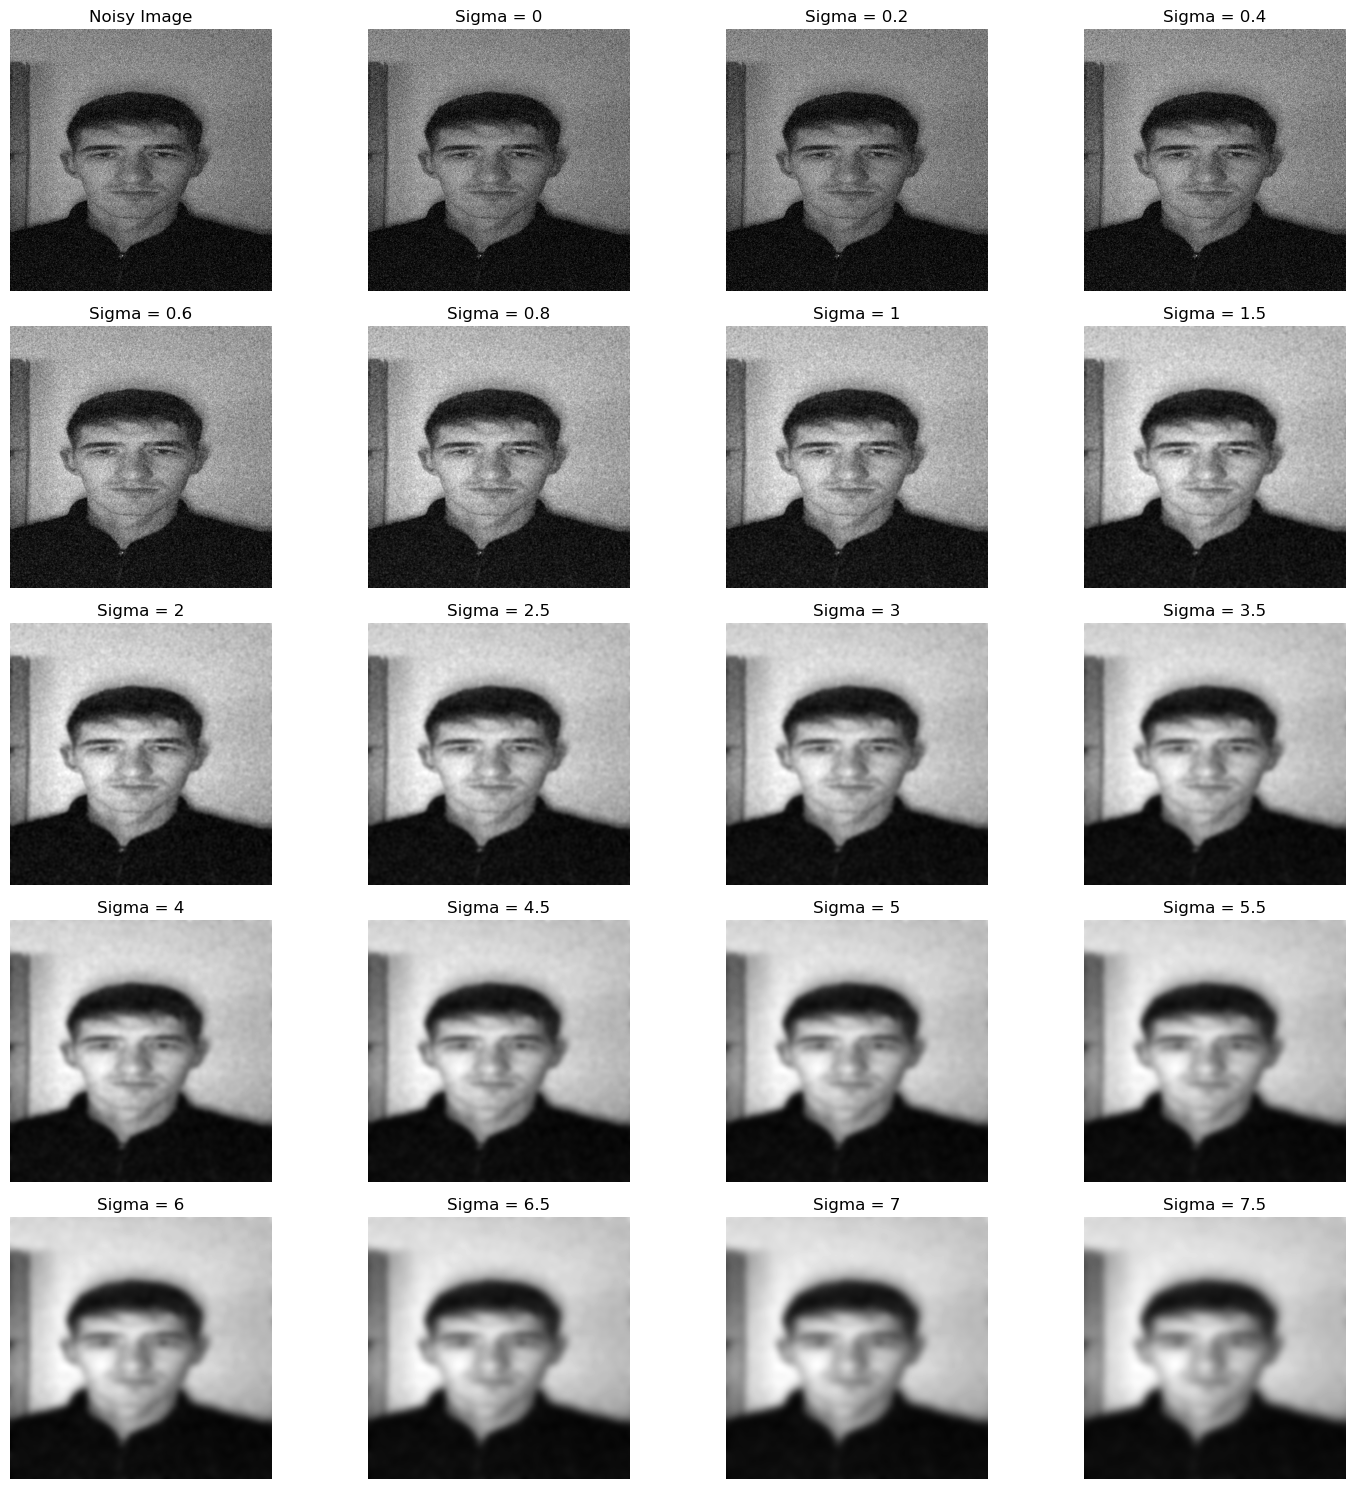

In [4]:
## noisy_image is from previous section (C)

sigma_vals = [
  0, 0.2, 0.4,
  0.6, 0.8, 1, 1.5,
  2, 2.5, 3, 3.5,
  4, 4.5, 5, 5.5,
  6, 6.5, 7, 7.5
  ]

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

ax[0, 0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0, 0].set_title('Noisy Image')
ax[0, 0].axis('off')

for idx, sigma in enumerate(sigma_vals, start=1):
  row = idx // 4
  col = idx % 4
  # mean is always 0.0 for this
  output = filters.gaussian(noisy_image, sigma=sigma)

  ax[row, col].imshow(output, cmap=plt.cm.gray)
  ax[row, col].set_title(f'Sigma = {sigma}')
  ax[row, col].axis('off')

fig.tight_layout()

plt.savefig(os.path.join(assignment_dir, 'gaussian_filter_diff_sigma.jpg'))
plt.show()



ii)
The ideal sigma value would depend on the application. In the results above, the blurring becomes visible at around 3-3.5, and gets worse and worse. The shape of the face and shoulders are still visible at a sigma value of 7.5, however the detail in the face is not clear anymore. The noise in the background is a less obvious.

Sigma value of 2.5 provides an image with very little blur, and an image where facial details can still be seen. The noise in the background is stil there, however it is smoother than in the original, and the shape and facial features are still clear.

iii)
The Gaussian filters works better in this instance as it allows the amount of smoothing that occurs to be varied. This allows for visual inspection, to view the preferred output. After a certain value of sigma, it also becomes very effective at clearing some noise, while still keeping features visible. After sigma exceeds 1, there is more noise removed by the gaussian filter, than the mean or median filters.
